SETTING UP FOR MODEL

In [104]:
# Importing Libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt  
from collections import Counter
import random
from PIL import Image

In [55]:
#function to convert data
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

LOADING CIFAR-10 DATASET

In [56]:
file_path = r"/home/priyansh/Downloads/cifar-10-batches-py/data_batch_1"
data1 = unpickle(file_path)

In [61]:
data1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

#### Label Class
###### 1   Airplane
###### 2   Automobile
###### 3   Bird
###### 4   Cat
###### 5   Deer
###### 6   Dog
###### 7   Frog
###### 8   Horse
###### 9   Ship
###### 10  Truck

 DATA CLEANING AND PREPARATION

In [70]:
df1 = pd.DataFrame(data1[b'data'])
label1 = pd.DataFrame(data1[b'labels'])     

In [63]:
test = unpickle("/home/priyansh/Downloads/cifar-10-batches-py/test_batch")
test = pd.DataFrame(test[b'data'])
test.shap

(10000, 3072)

CREATING MODEL

In [65]:
def least_distances_indices(alist,K):
    distances = np.array(alist)
    sorted_indices = np.argsort(distances)
    least_indices = sorted_indices[1:1+K]
    return least_indices


In [87]:
def KNN(image,K):
    dist = np.sum((df1-image)**2, axis=1)
    indices = least_distances_indices(dist,K)
    closest_index = Counter(indices).most_common(1)[0][0]
    return label1.iloc[closest_index]

IMPLEMENTING MODEL

In [98]:
ind  = random.randint(0,len(df1))
sample_img = df1.iloc[ind]
predicted_img = KNN(sample_img,10)
actual_img = label1.iloc[ind]


print(f"ind is {ind}")
print(f"Predicted: {predicted_img[0]} , Actaual: {actual_img[0]}")

ind is 4556
Predicted: 0 , Actaual: 7


CHECKING MODEL

In [100]:
results=[]
counter=0
for i in range(1000):
    ind  = random.randint(0,len(df1))
    sample_img = df1.iloc[ind]
    predicted_img = KNN(sample_img,10)[0]
    actual_img = label1.iloc[ind][0]
    if predicted_img==actual_img:
        counter+=1
    results.append((actual_img,predicted_img))

print(f"Accuracy: {counter*100/1000} %.")

Accuracy: 2.33 %.


CHECKING MODEL ON TEST SET

In [103]:
results=[]
counter=0
for img in test:
    predicted_img = KNN(img,10)[0]
    actual_img = label1.iloc[ind][0]
    if predicted_img==actual_img:
        counter+=1
    results.append((actual_img,predicted_img))

print(f"Accuracy: {counter*100/len(test)} %.")

Accuracy: 16.56 %.


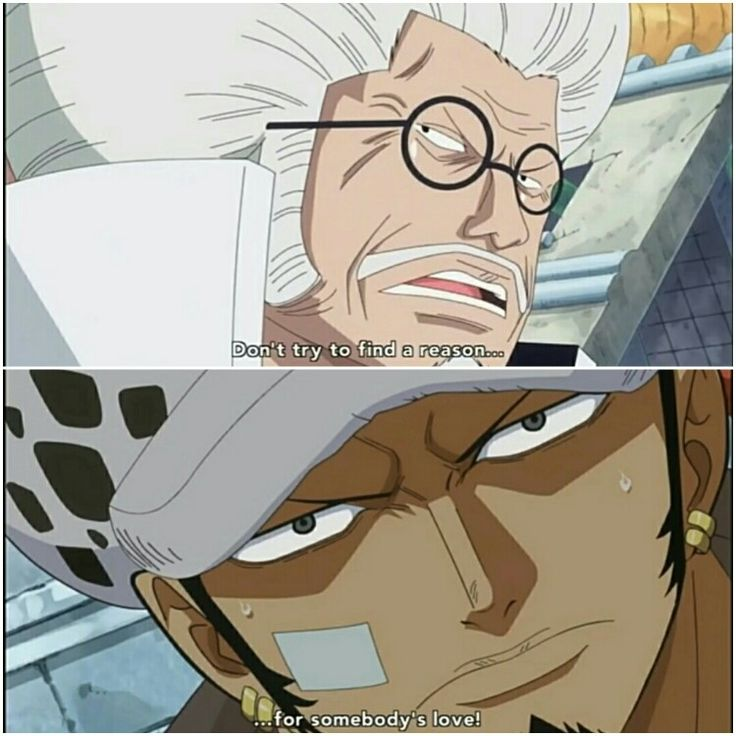

In [105]:
image = Image.open('/home/priyansh/Downloads/k.jpeg')
image